#Overview

In this project, I build an algorithm to predict whether a particular in lending club will be a success or a failure. A successful loan is a loan that is fully paid off. A failure loan is a loan either in default state or charged off state, where there is no reasonable expectation that the loan will be paid off. 

In [1]:

# Load all the data 
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer

In [244]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [3]:
df = pd.read_csv('/Volumes/mac/Work/JobHunt/Incubator/ipynb/LoanStats3a_securev1.csv',skiprows=1)
dfb = pd.read_csv('/Volumes/mac/Work/JobHunt/Incubator/ipynb/LoanStats3b_securev1.csv',skiprows=1)
dfc = pd.read_csv('/Volumes/mac/Work/JobHunt/Incubator/ipynb/LoanStats3c_securev1.csv',skiprows=1)
dfd = pd.read_csv('/Volumes/mac/Work/JobHunt/Incubator/ipynb/LoanStats3d_securev1.csv',skiprows=1)
# df.append(pd.read_csv('/Volumes/mac/Work/JobHunt/Incubator/ipynb/LoanStats3c_securev1.csv',skiprows=2))
# df.append(pd.read_csv('/Volumes/mac/Work/JobHunt/Incubator/ipynb/LoanStats3d_securev1.csv',skiprows=2))


/Users/jingfengli/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/jingfengli/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
totdf = df
print totdf.shape
totdf = df.append(dfb)
print totdf.shape
totdf = totdf.append(dfc)
print totdf.shape
totdf = totdf.append(dfd)
print totdf.shape

(42538, 56)
(230663, 56)
(466294, 56)
(646398, 56)


In [5]:
import numpy as np


In [12]:

stats = pd.unique(df.loan_status)

cnts ={}
for i in stats:
    cnts[i] = len(df.loan_amnt[df.loan_status==i])



##To deal with the abnormality of the input data, for instance, to deal with the placeholders

In [92]:
totdf['stat'] = pd.Series(np.zeros(np.shape(totdf['id'])))

success = ['Fully Paid']
failure = ['Charged Off','Default']
question = ['In Grace Period','Late (16-30 days)','Late (31-120 days)']

for i in success:
    totdf.stat[totdf.loan_status == i] = 1

for i in failure:
    totdf.stat[totdf.loan_status == i] = -1

for i in question:
    totdf.stat[totdf.loan_status == i] = 0.5



/Users/jingfengli/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jingfengli/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jingfengli/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<bound method Series.count of 0         1.0
1        -1.0
2         1.0
3         1.0
4         0.0
5         1.0
6         0.0
7         1.0
8        -1.0
9        -1.0
10        1.0
11        1.0
12       -1.0
13        1.0
14       -1.0
15        1.0
16        1.0
17        1.0
18        1.0
19        1.0
20        1.0
21       -1.0
22        1.0
23        1.0
24       -1.0
25        1.0
26       -1.0
27       -1.0
28        1.0
29        1.0
         ... 
180074    0.0
180075    0.0
180076    0.0
180077    0.0
180078    0.0
180079    0.0
180080    0.0
180081    0.0
180082    0.0
180083    0.0
180084    0.0
180085    0.0
180086    0.0
180087    0.0
180088    0.0
180089    1.0
180090    0.0
180091    0.0
180092    1.0
180093    0.0
180094    0.5
180095    0.0
180096    0.0
180097    0.0
180098    0.0
180099    0.0
180100    0.0
180101    0.0
180102    0.0
180103    0.0
Name: stat, dtype: float64>

In [96]:
(totdf.stat[totdf.stat == -1]).count()*1.0/((totdf.stat[totdf.stat == 1]).count() + (totdf.stat[totdf.stat == -1]).count())

0.17862167468184467

In [7]:
CleanUpRecord = totdf.loc[(totdf.stat==1)|(totdf.stat==-1)]

In [237]:
print CleanUpRecord.pymnt_plan.unique()
# pd.unique(totdf.issue_d)
# CleanUpRecord['after']
# from datetime import datetime

(CleanUpRecord.loc[CleanUpRecord.stat== -1]).iloc[3]

['n']


id                                                                       1064687
member_id                                                                1298717
loan_amnt                                                                   9000
funded_amnt                                                                 9000
funded_amnt_inv                                                             9000
term                                                                   36 months
int_rate                                                                  13.49%
installment                                                               305.38
grade                                                                          C
sub_grade                                                                     C1
emp_title                                    Va. Dept of Conservation/Recreation
emp_length                                                              < 1 year
home_ownership              

# Distribution of loans from Lending Club

In [60]:
import requests as rq

ms=rq.get('https://www.lendingclub.com/browse/loanDetail.action?loan_id=60496441&previous=browse')

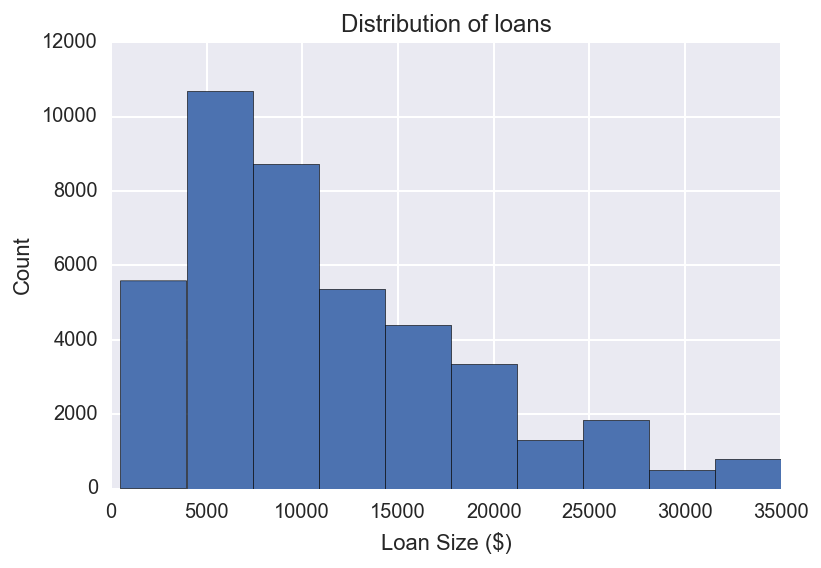

In [24]:
import matplotlib.pyplot as plt
plt.hist(df.loan_amnt,range=(500,35000))
plt.xlabel('Loan Size ($)')
plt.ylabel('Count')
plt.title('Distribution of loans')
plt.show()

In [8]:
df = CleanUpRecord

In [51]:
hist, bin_edges = np.histogram(df.loan_amnt,range=(0,35000))

In [106]:
bin_edges[-1] += 1
rate = np.zeros(hist.shape)
payrate = np.zeros(hist.shape)
for i in range(len(bin_edges)-1):
    left_edge = bin_edges[i]
    right_edge = bin_edges[i+1]
    incid = df.stat[(df['loan_amnt'] >= left_edge) & (df['loan_amnt'] < right_edge)]
    amnt = df.loan_amnt[(df['loan_amnt'] >= left_edge) & (df['loan_amnt'] < right_edge)]
    rate[i] = len(incid[incid==1]) *1.0 / (len(incid[incid==1]) + len(incid[incid==-1]) )
    payrate[i] = (sum(amnt[incid==1]) + sum(amnt[incid==-1]) )

# plt.figure()
# #plt.subplot(211)
# plt.plot(payrate,rate)
# plt.show()

In [143]:
relevant = [ 'annual_inc',
             'dti', 
#             'earliest_cr_line',
             'emp_length',
             'fico_range_high',
             'fico_range_low',
#              'funded_amnt',
             'grade',
             'home_ownership',
#              'last_credit_pull_d',
             'last_fico_range_high',
             'last_fico_range_low',
             'loan_amnt',
             'open_acc',
             'policy_code',
             'pub_rec',
#             'purpose',
#             'sub_grade',
             'term',
             'total_acc']

feat = df[relevant]
labl = df['stat']
full = df[relevant +['stat']]

emp = pd.Series(np.zeros(labl.shape))
# print pd.unique(feat.emp_length)

# feat.emp_length[feat.emp_length]

emp_mapping = {'10+ years':15, '< 1 year':0, '1 year':1, 
               '3 years':3, '8 years':8, '9 years':9, 
               '4 years':4, '5 years':5, '6 years':6, 
               '2 years':2, '7 years':7, 'n/a':np.nan}
for emp in emp_mapping:
#     print emp
    feat.emp_length[feat.emp_length==emp] = emp_mapping[emp]

tot_feat = feat[(labl==1) | (labl==-1)]
tot_labl = labl[(labl==1) | (labl==-1)]
 


/Users/jingfengli/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [144]:
pd.unique(tot_feat.emp_length)
tot_feat.emp_length[np.isnan(tot_feat.emp_length.astype('float'))] = (tot_feat.emp_length[~np.isnan(tot_feat.emp_length.astype('float'))]).median()
tot_feat.emp_length = pd.Series(tot_feat.emp_length.astype('int'))

/Users/jingfengli/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [145]:
tot_feat_vec = pd.get_dummies(tot_feat.fillna(tot_feat.median()))
#

In [146]:
tot_feat_vec.columns

Index([u'annual_inc', u'dti', u'emp_length', u'fico_range_high',
       u'fico_range_low', u'last_fico_range_high', u'last_fico_range_low',
       u'loan_amnt', u'open_acc', u'policy_code', u'pub_rec', u'total_acc',
       u'grade_A', u'grade_B', u'grade_C', u'grade_D', u'grade_E', u'grade_F',
       u'grade_G', u'home_ownership_ANY', u'home_ownership_MORTGAGE',
       u'home_ownership_NONE', u'home_ownership_OTHER', u'home_ownership_OWN',
       u'home_ownership_RENT', u'term_ 36 months', u'term_ 60 months'],
      dtype='object')

In [147]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tot_feat_vec, tot_labl, test_size=0.33)

 

0.2174657757284462

In [148]:
#%%
# Random forest regressor
clf2 = RandomForestClassifier(n_estimators=100,                     # number of trees in the forest
                        criterion='gini', max_depth=None, 
                        min_samples_split=2, min_samples_leaf=1,
                        min_weight_fraction_leaf=0.0, max_features='auto',
                        max_leaf_nodes=None, bootstrap=True, oob_score=True, 
                        n_jobs=1, random_state=None, verbose=0, 
                        warm_start=False, class_weight=None)
# use the model to predict the k th data point
y_train[y_train==-1] = 0.0
y_train[y_train==1]  = 1.0

clf2.fit(X_train, y_train)
# clf2.fit(X_train, y_train==1)
import dill
with open('./rf_lendingclub_p.pkl', 'wb') as out_strm:
    dill.dump(clf2,out_strm)


In [155]:
importance=[(tot_feat_vec.columns[i],clf2.feature_importances_[i]) for i in xrange(len(clf2.feature_importances_))]

importance = sorted(importance,key = lambda tup:tup[1],reverse=True)
print importance

[('last_fico_range_high', 0.37887005225217052), ('last_fico_range_low', 0.3552881598546252), ('dti', 0.038774137251171653), ('loan_amnt', 0.037176401533127332), ('annual_inc', 0.0337271048156014), ('total_acc', 0.029974447095367833), ('open_acc', 0.023197600253858613), ('fico_range_low', 0.019655878594017302), ('fico_range_high', 0.019299034581610995), ('emp_length', 0.017706655750006284), ('term_ 36 months', 0.0064596494054480992), ('term_ 60 months', 0.0055967415703097592), ('pub_rec', 0.00431217210688055), ('home_ownership_RENT', 0.0041029824304117737), ('home_ownership_MORTGAGE', 0.0039752105358532488), ('grade_D', 0.003797516364670234), ('grade_C', 0.0037676161805019776), ('grade_B', 0.0036367594115479774), ('grade_E', 0.0030221192760326011), ('grade_A', 0.002942356952621716), ('home_ownership_OWN', 0.0024745321125227487), ('grade_F', 0.0016950650867930631), ('grade_G', 0.00048511287258049088), ('home_ownership_OTHER', 3.4856103722315391e-05), ('home_ownership_NONE', 2.77971900348

In [164]:
(pd.unique(tot_labl))

array([ 1., -1.])

In [158]:
y_pred = clf2.predict(tot_feat_vec)

In [165]:
tot_labl[tot_labl == -1] =0
Hits = sum(tot_labl[y_pred==1])
FalseAlarm = len(tot_labl[y_pred==1]) - Hits
Miss = sum(tot_labl[y_pred == 0])
CorrectRejection = len(tot_labl[y_pred == 0]) - Miss


0.92899844189
4.70995051571


In [172]:
print (FalseAlarm+CorrectRejection)*100 / len(tot_labl)

17.8621674682


In [203]:
# x=tot_feat.groupby('grade').count()
full.grade=='B'

0          True
1         False
2         False
3         False
5         False
7         False
8         False
9          True
10        False
11         True
12        False
13         True
14         True
15        False
16        False
17        False
18         True
19        False
20        False
21         True
22         True
23         True
24         True
25         True
26        False
27        False
28         True
29         True
30        False
31        False
          ...  
179623     True
179628    False
179661    False
179662     True
179663     True
179692    False
179741    False
179749     True
179760     True
179782    False
179784    False
179826    False
179829    False
179837     True
179840     True
179862    False
179882    False
179889    False
179895    False
179907    False
179908    False
179915    False
179920    False
179923    False
179934    False
179974    False
180011    False
180070    False
180089    False
180092     True
Name: grade, dtype: bool

In [205]:
LabelB = full.stat[full.grade=='B']
y_pred = np.array(y_pred)

len(y_predB),len(y_pred)

(56943, 186937)

In [239]:
# tot_labl[tot_labl == -1] =0
Grader = 'A'
LabelB = full.stat[full['grade']==Grader]
y_predB = y_pred[np.array(full.grade==Grader)]

money = full.loan_amnt[full.grade==Grader]

#
LabelB[LabelB==-1] = 0


Hits = sum(LabelB[y_predB==1])
FalseAlarm = len(LabelB[y_predB==1]) - Hits
Miss = sum(LabelB[y_predB == 0])
CorrectRejection = len(LabelB[y_predB == 0]) - Miss

print 'False alarm, should NOT have FUNDED -------',FalseAlarm*100.0/(Hits + FalseAlarm)
print 'Missing, should have FUNDED ---------------',Miss*100.0/(CorrectRejection + Miss)
print 'Default rate ------------------------------',(FalseAlarm + CorrectRejection)*100 / len(LabelB)

HitsMoney = sum(LabelB[y_predB==1]*money[y_predB==1])
FalseAlarmMoney = sum(money[y_predB==1]) - HitsMoney
MissMoney = sum(LabelB[y_predB == 0]*money[y_predB==0])
CorrectRejectionMoney = sum(money[y_predB == 0]) - MissMoney

print 'False alarm, should NOT have FUNDED -------',FalseAlarmMoney*100.0/(HitsMoney + FalseAlarmMoney)
print 'Missing, should have FUNDED ---------------',MissMoney*100.0/(CorrectRejectionMoney + MissMoney)
print 'Default rate ------------------------------',(FalseAlarmMoney + CorrectRejectionMoney)*100 / sum(money)

False alarm, should NOT have FUNDED ------- 0.529396290938
Missing, should have FUNDED --------------- 6.7081935793
Default rate ------------------------------ 6.48635342626
False alarm, should NOT have FUNDED ------- 0.454064324506
Missing, should have FUNDED --------------- 5.39836689138
Default rate ------------------------------ 6.24525867511


In [229]:
HitsMoney = sum(LabelB[y_predB==1]*money[y_predB==1])
FalseAlarmMoney = sum(money[y_predB==1]) - HitsMoney
MissMoney = sum(LabelB[y_predB == 0]*money[y_predB==0])
CorrectRejectionMoney = sum(money[y_predB == 0]) - MissMoney
print 'False alarm, should NOT have FUNDED -------',FalseAlarmMoney*100.0/(HitsMoney + FalseAlarmMoney)
print 'Missing, should have FUNDED ---------------',MissMoney*100.0/(CorrectRejectionMoney + MissMoney)
print 'Default rate ------------------------------',(FalseAlarmMoney + CorrectRejectionMoney)*100 / len(LabelBMoney)

 False alarm, should NOT have FUNDED ------- 0.788355076854
Missing, should have FUNDED --------------- 5.02276875905
Default rate ------------------------------

NameError: name 'LabelBMoney' is not defined

In [276]:
(totdf.loc[(totdf.stat==1) | (totdf.stat== -1) ]).groupby(['stat','grade']).count()
# groupby('stat')

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv   term  \
stat grade                                                                     
-1   A       2108       2108       2108         2108             2108   2108   
     B       7513       7513       7513         7513             7513   7513   
     C       9173       9173       9173         9173             9173   9173   
     D       7515       7515       7515         7515             7515   7515   
     E       4351       4351       4351         4351             4351   4351   
     F       2178       2178       2178         2178             2178   2178   
     G        553        553        553          553              553    553   
 1   A      30391      30391      30391        30391            30391  30391   
     B      49430      49430      49430        49430            49430  49430   
     C      38184      38184      38184        38184            38184  38184   
     D      21823      21823      21823        21823            21823  21823   
     E       9315       9315       9315         9315             9315   9315   
     F       3544       3544       3544         3544             3544   3544   
     G        859        859        859          859              859    859   

            int_rate  installment  sub_grade  emp_title     ...       \
stat grade                                                  ...        
-1   A          2108         2108       2108       1881     ...        
     B          7513         7513       7513       6869     ...        
     C          9173         9173       9173       8463     ...        
     D          7515         7515       7515       6949     ...        
     E          4351         4351       4351       4061     ...        
     F          2178         2178       2178       2044     ...        
     G           553          553        553        516     ...        
 1   A         30391        30391      30391      28605     ...        
     B         49430        49430      49430      46952     ...        
     C         38184        38184      38184      36492     ...        
     D         21823        21823      21823      20751     ...        
     E          9315         9315       9315       8894     ...        
     F          3544         3544       3544       3404     ...        
     G           859          859        859        825     ...        

            collection_recovery_fee  last_pymnt_d  last_pymnt_amnt  \
stat grade                                                           
-1   A                         2108          2081             2108   
     B                         7513          7451             7513   
     C                         9173          9070             9173   
     D                         7515          7408             7515   
     E                         4351          4268             4351   
     F                         2178          2151             2178   
     G                          553           547              553   
 1   A                        30391         30391            30391   
     B                        49430         49430            49430   
     C                        38184         38184            38184   
     D                        21823         21823            21823   
     E                         9315          9315             9315   
     F                         3544          3544             3544   
     G                          859           859              859   

            next_pymnt_d  last_credit_pull_d  last_fico_range_high  \
stat grade                                                           
-1   A                 9                2108                  2108   
     B                32                7512                  7513   
     C                47                9172                  9173   
     D                37                7515                  7515   
     E                17                

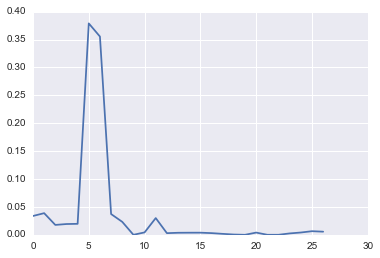

In [252]:
import matplotlib.pyplot as plt 
plt.figure
# plt.subplot(221)
plt.plot(clf2.feature_importances_)
# # plt.show()
# plt.subplot(222)
# plt.plot(clf2.feature_importances_)
plt.show()

In [131]:
y_pred=clf2.predict(X_test)


In [89]:
cnt = 0
baseline = 0
for i in xrange(len(y_test)):
    if y_test.iloc[i] == 1:
        baseline += 1
        if y_pred[i]:
            cnt += 1
    elif y_test.iloc[i] == -1 and not y_pred[i]:
        cnt += 1
        
# test_pred_err = clf2.oob_decision_function_
# test_pred = np.floor(test_pred_err[:,1] *2)
# test_pred[test_pred>=2] = 1
# print sum(abs(test_pred-train_labl))*100.0/len(train_labl)



0.27026752328324516

In [123]:
full.groupby(['stat','grade']).count(1)

annual_inc    dti  emp_length  fico_range_high  fico_range_low  \
stat grade                                                                   
-1   A            2108   2108        2108             2108            2108   
     B            7513   7513        7513             7513            7513   
     C            9173   9173        9173             9173            9173   
     D            7515   7515        7515             7515            7515   
     E            4351   4351        4351             4351            4351   
     F            2178   2178        2178             2178            2178   
     G             553    553         553              553             553   
 1   A           30391  30391       30391            30391           30391   
     B           49430  49430       49430            49430           49430   
     C           38184  38184       38184            38184           38184   
     D           21823  21823       21823            21823           21823   
     E            9315   9315        9315             9315            9315   
     F            3544   3544        3544             3544            3544   
     G             859    859         859              859             859   

            funded_amnt  home_ownership  last_fico_range_high  \
stat grade                                                      
-1   A             2108            2108                  2108   
     B             7513            7513                  7513   
     C             9173            9173                  9173   
     D             7515            7515                  7515   
     E             4351            4351                  4351   
     F             2178            2178                  2178   
     G              553             553                   553   
 1   A            30391           30391                 30391   
     B            49430           49430                 49430   
     C            38184           38184                 38184   
     D            21823           21823                 21823   
     E             9315            9315                  9315   
     F             3544            3544                  3544   
     G              859             859                   859   

            last_fico_range_low  loan_amnt  open_acc  policy_code  pub_rec  \
stat grade                                                                   
-1   A                     2108       2108      2108         2108     2108   
     B                     7513       7513      7513         7513     7513   
     C                     9173       9173      9173         9173     9173   
     D                     7515       7515      7515         7515     7515   
     E                     4351       4351      4351         4351     4351   
     F                     2178       2178      2178         2178     2178   
     G                      553        553       553          553      553   
 1   A                    30391      30391     30391        30391    30391   
     B                    49430      49430     49430        49430    49430   
     C                    38184      38184     38184        38184    38184   
     D                    21823      21823     21823        21823    21823   
     E                     9315       9315      9315         9315     9315   
     F                     3544       3544      3544         3544     3544   
     G                      859        859       859          859      859   

             term  total_acc  
stat grade                    
-1   A       2108       2108  
     B       7513       7513  
     C       9173       9173  
     D       7515       7515  
     E       4351       4351  
     F       2178       2178  
     G        553        553  
 1   A      30391      30391  
     B      49430      49430  
     C      38184      38184  
     D      21823      21823  
     E       9315       9315  
     F       3544       3544  
     G  

In [88]:
cnt*1.0 / len(y_test)*100

95.07051385962069

In [242]:
#%%
tot = train_feat
tot['pred'] = test_pred
tot['actu'] = labl

#%%
bin_edges[-1] += 1
rate = np.zeros(hist.shape)
payrate = np.zeros(hist.shape)
prate = np.zeros(hist.shape)
for i in range(len(bin_edges)-1):
    left_edge = bin_edges[i]
    right_edge = bin_edges[i+1]
    incid = df.stat[(df['loan_amnt'] >= left_edge) & (df['loan_amnt'] < right_edge)]
    amnt = df.loan_amnt[(df['loan_amnt'] >= left_edge) & (df['loan_amnt'] < right_edge)]
    rate[i] = len(incid[incid==1]) *1.0 / (len(incid[incid==1]) + len(incid[incid==-1]) )
    payrate[i] = (sum(amnt[incid==1]) + sum(amnt[incid==-1]) )




NameError: name 'test_pred' is not defined

In [241]:
#%%
for i in range(len(bin_edges)-1):
    left_edge = bin_edges[i]
    right_edge = bin_edges[i+1]
    incid = tot[(tot['loan_amnt'] >= left_edge) & (df['loan_amnt'] < right_edge)]
    rate[i] = len(incid[incid.actu == 1])*100.0/len(incid)
    prate[i] = len(incid[(incid.actu- incid.pred)==0])*100.0/len(incid)
    


NameError: name 'bin_edges' is not defined

In loans funded in Lending Club, about 15 percent of loans are a failure, and 85 % percent of the loans are successful. 
For loans of a large amount, the failure rate is particularly high. 

In [240]:
N = 10
menMeans   = rate
womenMeans = 100 - rate

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
# plt.subplot(211)
plt.figure()
p1 = plt.bar(ind, menMeans,   width, color='r',label='Success loans')
p2 = plt.bar(ind, womenMeans, width, color='y',label='Failure loans (charged off/Default)',
             bottom=menMeans)


plt.ylabel('Percentage')
# plt.title('successful loans versus failed loans')
plt.xticks(np.asarray([0,5,9])+width/2., ('5000','20000','35000') )
#plt.yticks(np.arange(0,81,10))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Loan Size ($)')
plt.show()

NameError: name 'rate' is not defined

The goal of my project is to predict whether a loan will be successful or not. 
To do that I downloaded data from lending club, selected several features to build a prediction model, including both numerical features, such as the annual income, the fico credit score, and also categorical features, such as the grade of the loan assigned by lending club. 

Using these features, I built a random forest model to predict whether the loan will be successful. 
The idea is to build a large number of decision trees, each is used to generate a prediction, and the final prediction is the average of these predictions from each tree. 
The strategy by my random forest model significantly decreases the chance of funding a failure loan, compared to the strategy by lending club, with a improvement of 40 %. 

In [221]:
# for i in range(len(bin_edges)-1):
#     left_edge = bin_edges[i]
#     right_edge = bin_edges[i+1]
#     incid = tot[(tot['loan_amnt'] >= left_edge) & (df['loan_amnt'] < right_edge)]
#     rate[i] = len(incid[incid.actu == 1])*100.0/len(incid)
#     prate[i] = len(incid[(incid.actu- incid.pred)==0])*100.0/len(incid)

# pold = 100-len(tot[tot.actu==1])*100.0/len(tot)
# pnew = 100-len(tot[(tot.actu-tot.pred)==0])*100.0/len(tot)
# print pold,pnew
# plt.figure()
# #plt.subplot(211)
# p1=plt.plot(bin_edges[:-1],100-rate,'b')
# p2=plt.plot(bin_edges[:-1],100-prate,'r')
# plt.xlabel('Loan Size ($)')
# plt.ylabel('Percent of failured loans')  
# plt.legend((p1[0],p2[0]),('Strategy by LendingClub', 'Strategy by my random forest model'))

# plt.title('Improved by %.2f %%' % ((pold-pnew)*100.0/pold))
# plt.show()

Moving forward, I would like to incorporate more features to further improve the model. One feature I am particular interested in the description of the loan provided by the borrower. It contains lots of details about the borrowers. I would also like to build a user interface to provide recommendation about whether or not one should fund a particular loan. 

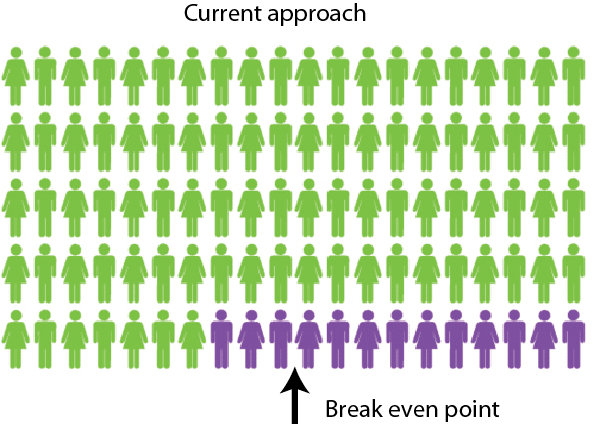

In [219]:
from IPython.display import Image
# Image(filename='test.png') 
 
Image(filename="./CurrentApproach.jpg")


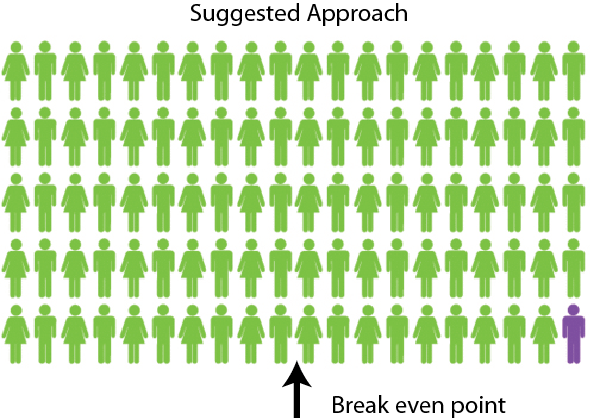

In [220]:





from IPython.display import Image
# Image(filename='test.png') 
 
Image(filename="./MyApproach.png")










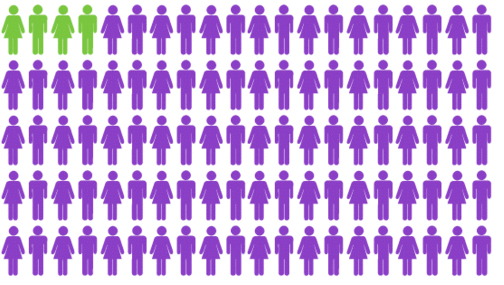

In [238]:



from IPython.display import Image
# Image(filename='test.png') 
 
Image(filename="./FalseNegative.jpg")


















